In [1]:
import gzip
import os
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [2]:
seed_list = [0, 1, 2, 3, 4, 5]

# Convolution with Laplace kernel in 2d

### Varying width

In [3]:
width_list = [32, 128, 512, 1024]
color_dict = {32: 'blue', 128: 'green', 512: 'orange', 1024: 'red'}

In [4]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for width in width_list:
        path = f'VarPro_convolution_2d/results/width{width:.0f}_lmbda-3.0_gamma100.0_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, width)] = pickle.load(f)
        path_unbiased = f'VarPro_convolution_2d_unbiased/results/width{width:.0f}_lmbda-3.0_gamma100.0_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, width)] = pickle.load(f)

100%|██████████| 6/6 [02:10<00:00, 21.72s/it]


Text(0.5, 1.0, 'Evolution of the risk during training')

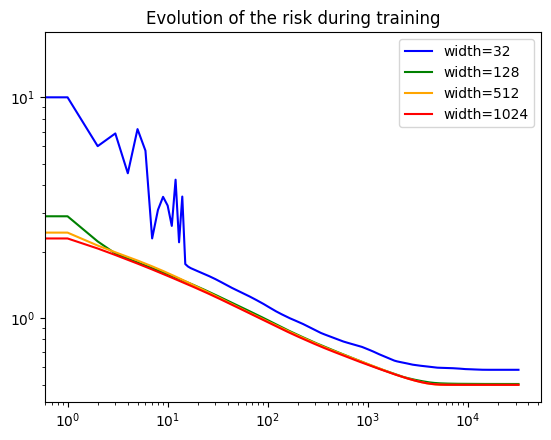

In [5]:
for width in width_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['loss_list'])
    res /= len(seed_list)
    plt.plot(res, color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_unbiased[(seed, width)]['loss_list'], color=color_dict[width], label=f'width={width}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Evolution of the risk during training')

Text(0.5, 1.0, 'Evolution of the (unbiased) reduced risk during training')

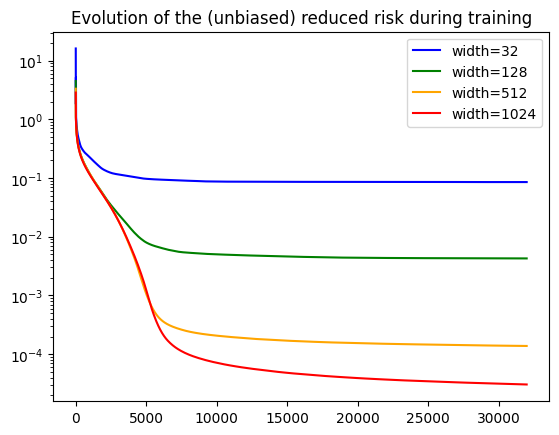

In [6]:
for width in width_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict_unbiased[(seed, width)]['loss_list'])
    res /= len(seed_list)
    plt.plot(res, color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_unbiased[(seed, width)]['loss_list'], color=color_dict[width], label=f'width={width}')
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Evolution of the (unbiased) reduced risk during training')

Text(0.5, 1.0, 'Distance to the teacher distribution')

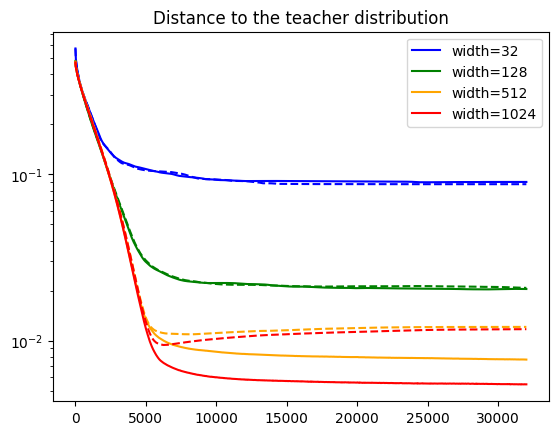

In [7]:
for width in width_list:
    idx = dict[(0,width)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, width)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    plt.plot(idx, res_unbiased, color=color_dict[width], label=f'width={width}')
    plt.plot(idx, res, '--', color=color_dict[width])
    #plt.plot(dict_unbiased[width]['distance_teacher_idx'], dict_unbiased[width]['distance_teacher_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict[width]['distance_teacher_idx'], dict[width]['distance_teacher_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Distance to the teacher distribution')

### Varying regularization strength

In [36]:
lmbda_list = [-1, -2, -3]
color_dict = {-1: 'blue', -2: 'green', -3: 'orange', -4: 'red', -5: 'black'}

In [41]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for lmbda in lmbda_list:
        path = f'VarPro_convolution_2d/results/width512_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, lmbda)] = pickle.load(f)
        path_unbiased = f'VarPro_convolution_2d_unbiased/results/width512_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, lmbda)] = pickle.load(f)

100%|██████████| 6/6 [01:38<00:00, 16.37s/it]


Text(0.5, 1.0, 'Evolution of the reduced risk during training')

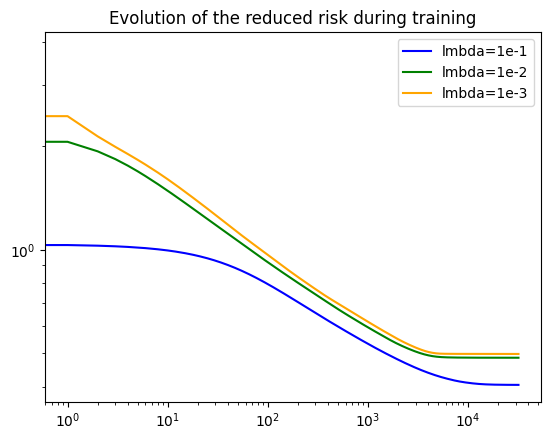

In [42]:
for lmbda in lmbda_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict[(seed, lmbda)]['loss_list'])
    res /= len(seed_list)
    plt.plot(res, color=color_dict[lmbda], label=f'lmbda=1e{lmbda:.0f}')
    #plt.plot(dict_unbiased[lmbda]['loss_list'], color=color_dict[lmbda], label=f'lmbda=1e{lmbda:.0f}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Evolution of the reduced risk during training')

Text(0.5, 1.0, 'Evolution of the (unbiased) reduced risk during training')

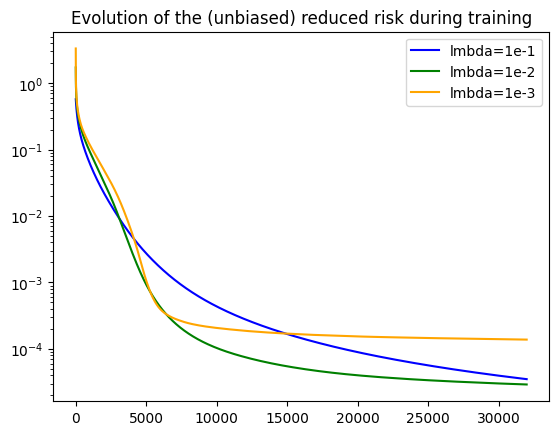

In [43]:
for lmbda in lmbda_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict_unbiased[(seed, lmbda)]['loss_list'])
    res /= len(seed_list)
    plt.plot(res, color=color_dict[lmbda], label=f'lmbda=1e{lmbda:.0f}')
    #plt.plot(dict_unbiased[lmbda]['loss_list'], color=color_dict[lmbda], label=f'lmbda=1e{lmbda:.0f}')
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Evolution of the (unbiased) reduced risk during training')

Text(0.5, 1.0, 'Distance to the teacher distribution')

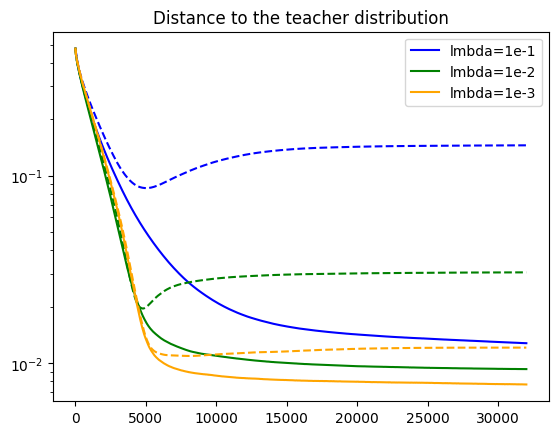

In [46]:
for lmbda in lmbda_list:
    idx = dict[(0,lmbda)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, lmbda)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, lmbda)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    plt.plot(idx, res_unbiased, color=color_dict[lmbda], label=f'lmbda=1e{lmbda:.0f}')
    plt.plot(idx, res, '--', color=color_dict[lmbda])
    #plt.plot(dict_unbiased[lmbda]['distance_teacher_idx'], dict_unbiased[lmbda]['distance_teacher_list'], color=color_dict[lmbda], label=f'lmbda=1e{lmbda:.0f}')
    #plt.plot(dict[lmbda]['distance_teacher_idx'], dict[lmbda]['distance_teacher_list'], '--', color=color_dict[lmbda])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Distance to the teacher distribution')

### Varying the shape of the target distribution

In [13]:
gamma_list = [100, -1]
color_dict = {100: 'blue', -1: 'orange'}

In [15]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for gamma in gamma_list:
        path = f'VarPro_convolution_2d/results/width1024_lmbda-2.0_gamma{gamma:.1f}_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, gamma)] = pickle.load(f)
        path_unbiased = f'VarPro_convolution_2d_unbiased/results/width1024_lmbda-2.0_gamma{gamma:.1f}_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, gamma)] = pickle.load(f)

100%|██████████| 6/6 [01:16<00:00, 12.82s/it]


Text(0.5, 1.0, 'Evolution of the reduced risk')

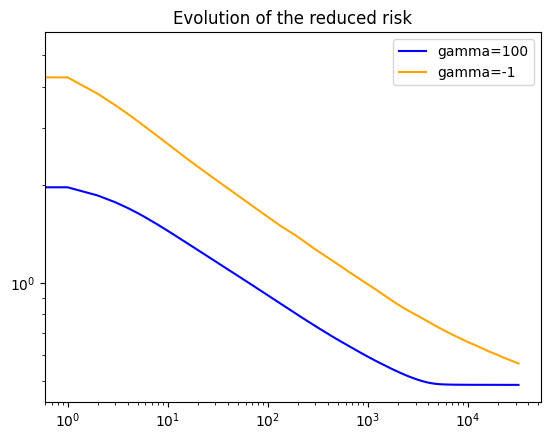

In [17]:
for gamma in gamma_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['loss_list'])
    res /= len(seed_list)
    plt.plot(res, color=color_dict[gamma], label=f'gamma={gamma}')
    #plt.plot(dict[gamma]['loss_list'], color=color_dict[gamma], label=f'gamma={gamma}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Evolution of the reduced risk')

Text(0.5, 1.0, 'Evolution of the (unbiased) reduced risk')

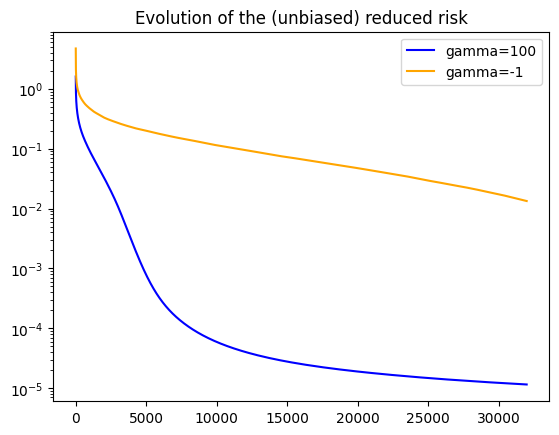

In [18]:
for gamma in gamma_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict_unbiased[(seed, gamma)]['loss_list'])
    res /= len(seed_list)
    plt.plot(res, color=color_dict[gamma], label=f'gamma={gamma}')
    #plt.plot(dict[gamma]['loss_list'], color=color_dict[gamma], label=f'gamma={gamma}')
plt.legend()
plt.yscale('log')
plt.title('Evolution of the (unbiased) reduced risk')

Text(0.5, 1.0, 'Distance to the teacher distribution')

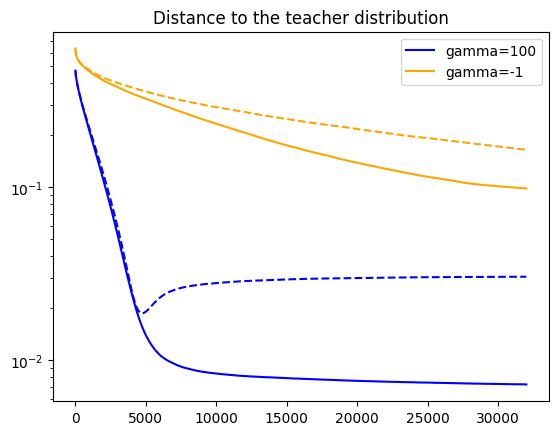

In [35]:
for gamma in gamma_list:
    idx = dict[(0,gamma)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, gamma)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    plt.plot(idx, res_unbiased, color=color_dict[gamma], label=f'gamma={gamma}')
    plt.plot(idx, res, '--', color=color_dict[gamma])
    #plt.plot(dict[gamma]['distance_teacher_idx'], dict[gamma]['distance_teacher_list'], color=color_dict[gamma], label=f'gamma={gamma}')
plt.legend()
plt.yscale('log')
plt.title('Distance to the teacher distribution')

In [27]:
from Utilities import weight_animation_2d

In [33]:
w_array = np.array([dico['feature_model.weight'].numpy() for dico in dict_unbiased[(0,100)]['student_state_list']]) 

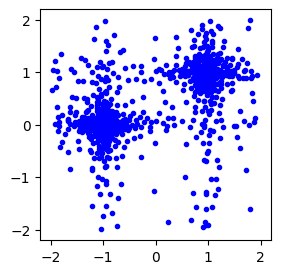

In [34]:
weight_animation_2d(w_array, name='Convolution_2d_gamma100.mp4')